# Pytorch 데이터 증강

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_data = datasets.CIFAR10(
    root = 'data',
    train = True,
    download = True,
    transform=transforms.ToTensor()
)

test_data = datasets.CIFAR10(
    root = 'data',
    train = False,
    download = True,
    transform=transforms.ToTensor()
)

# data loader
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print('CIFAR10 data size:', train_data.data[0].shape)

CIFAR10 data size: (32, 32, 3)


In [ ]:
# 시각화 함수
import matplotlib.pyplot as plt
from PIL import Image

def visualize(augmentation_func):
    fig, subplots = plt.subplots(2, 4, figsize=(14, 7)) # 2행 4열에 size 14x7
    for i in range(4):
        axi1 = subplots.flat[i]
        axi2 = subplots.flat[i+4]

        original_img = Image.fromarray(train_data.data[i])
        augmented_img = augmentation_func(original_img)

        axi1.imshow(original_img)
        axi2.imshow(augmented_img)
        axi1.set_title('original_img')
        axi2.set_title('augmented_img')

## Random Rotation

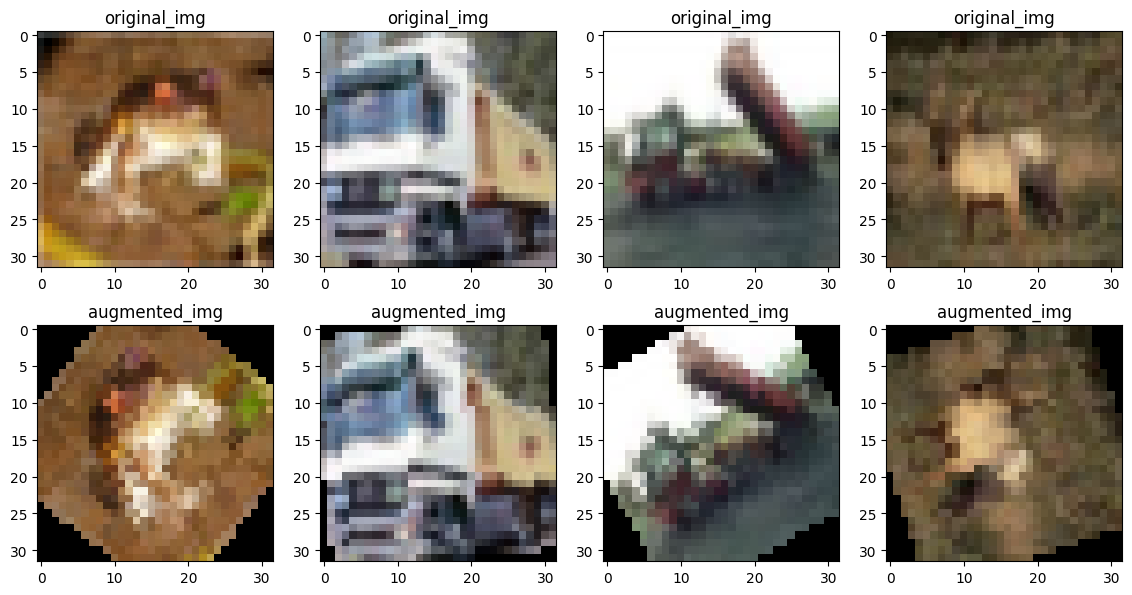

In [ ]:
rotation = transforms.RandomRotation(90) # -90에서 90도로 랜덤으로 돌린다는 의미
visualize(rotation)

## Random Horizontal Flip

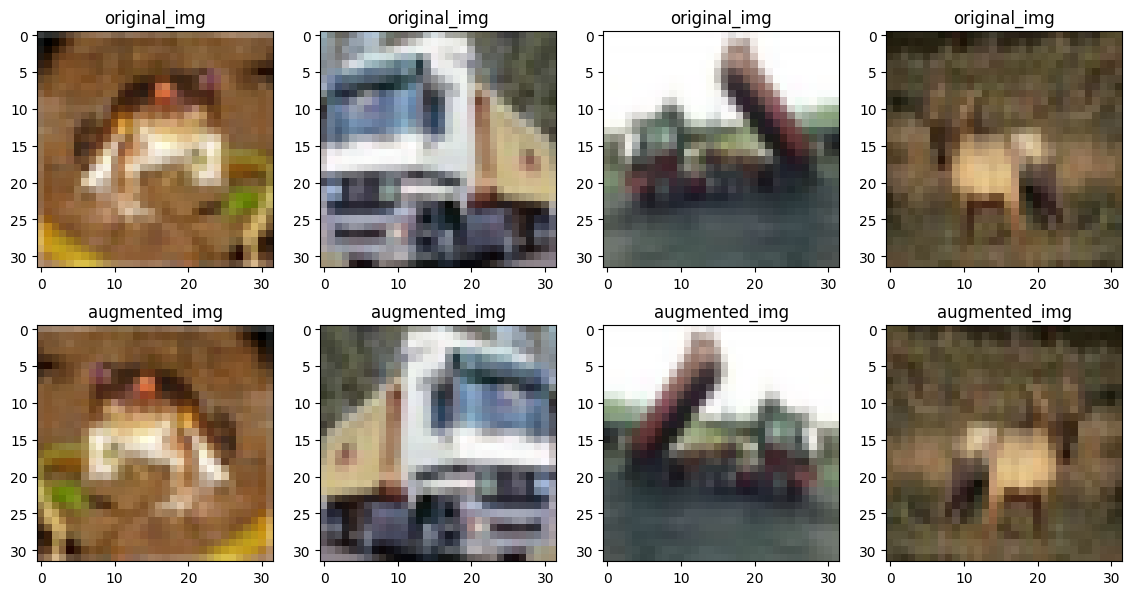

In [ ]:
horizontal_flip = transforms.RandomHorizontalFlip(p=1) # 좌우 반전 p의 확률로 RandomHorizontalFlip이 적용
visualize(horizontal_flip)

## Random Vertical Flip

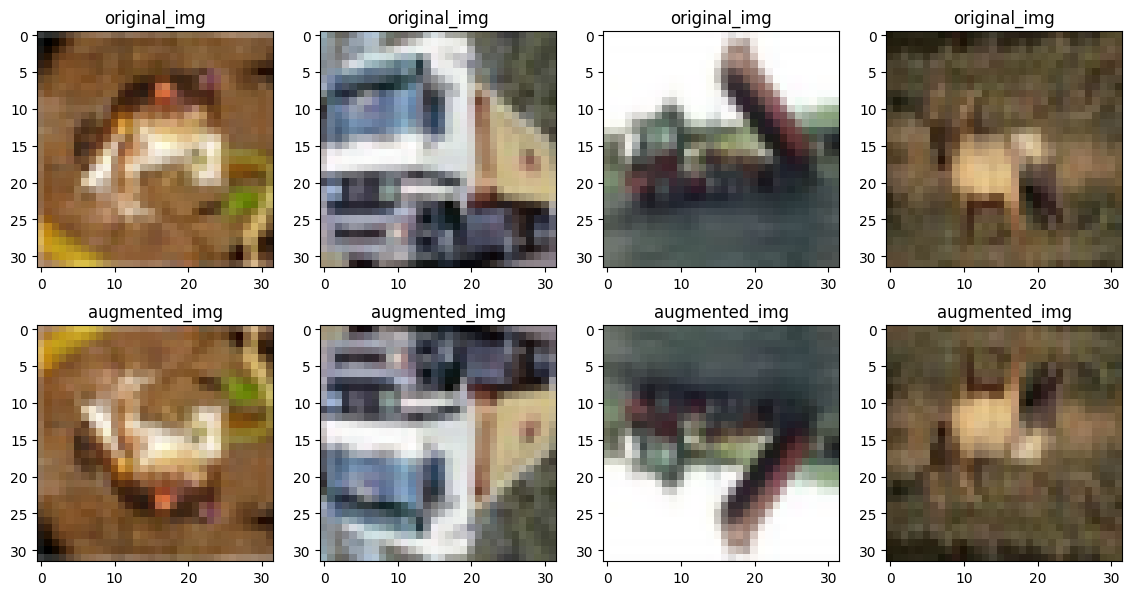

In [ ]:
vertical_flip = transforms.RandomVerticalFlip(p=1) # 상하 반전
visualize(vertical_flip)

## Random Crop

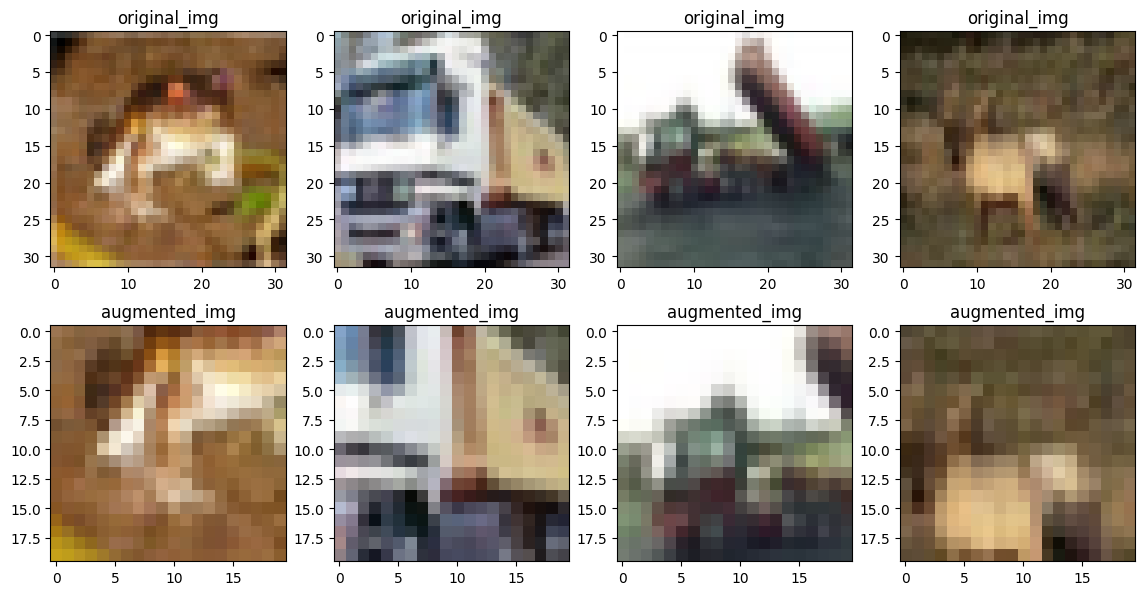

In [ ]:
crop = transforms.RandomCrop((20,20)) # 현재 이미지 사이즈 32x32에서 20x20 만큼 자름
visualize(crop)

## Resize

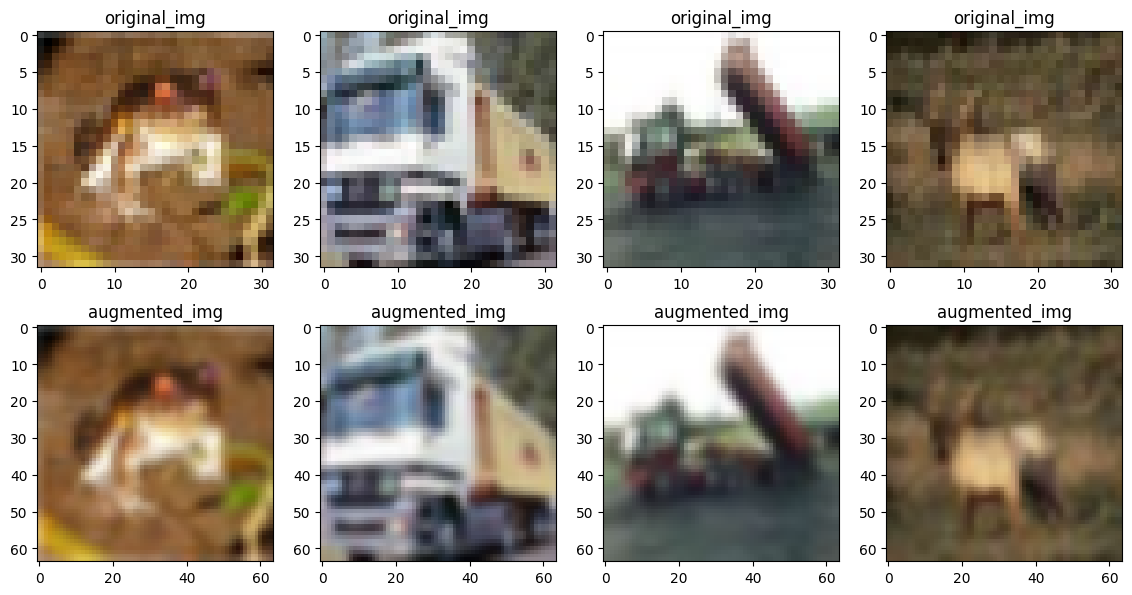

In [ ]:
resize = transforms.Resize((64,64)) # 원래 32x32 -> 64x64
visualize(resize)

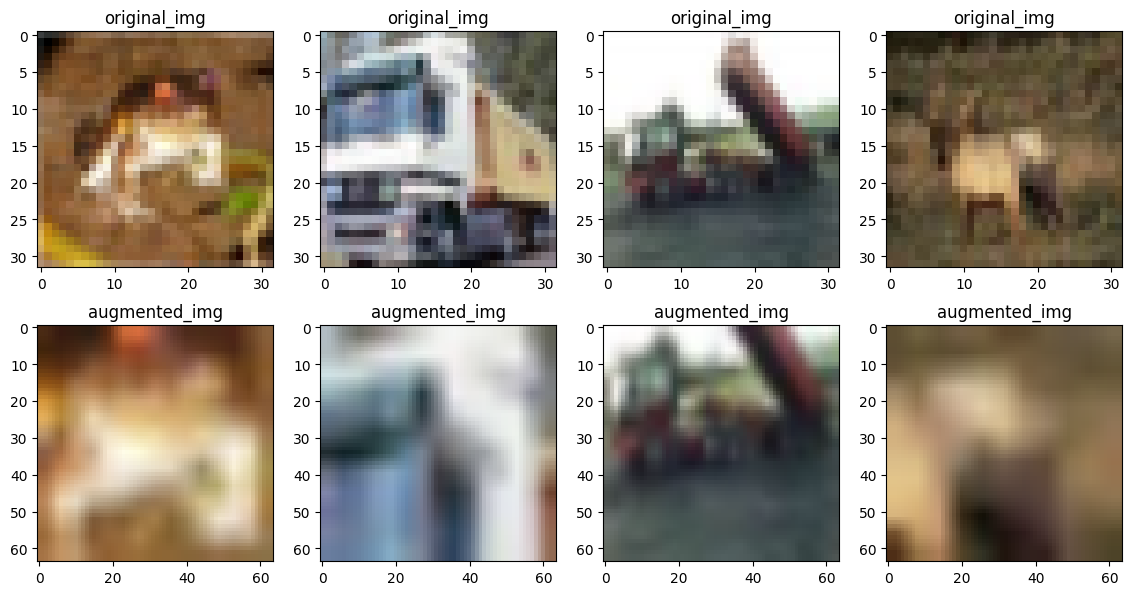

In [ ]:
resized_crop = transforms.RandomResizedCrop((64,64)) # Crop 후 32x32 -> 64x64 로 resize
visualize(resized_crop)

## Random Gray Scale

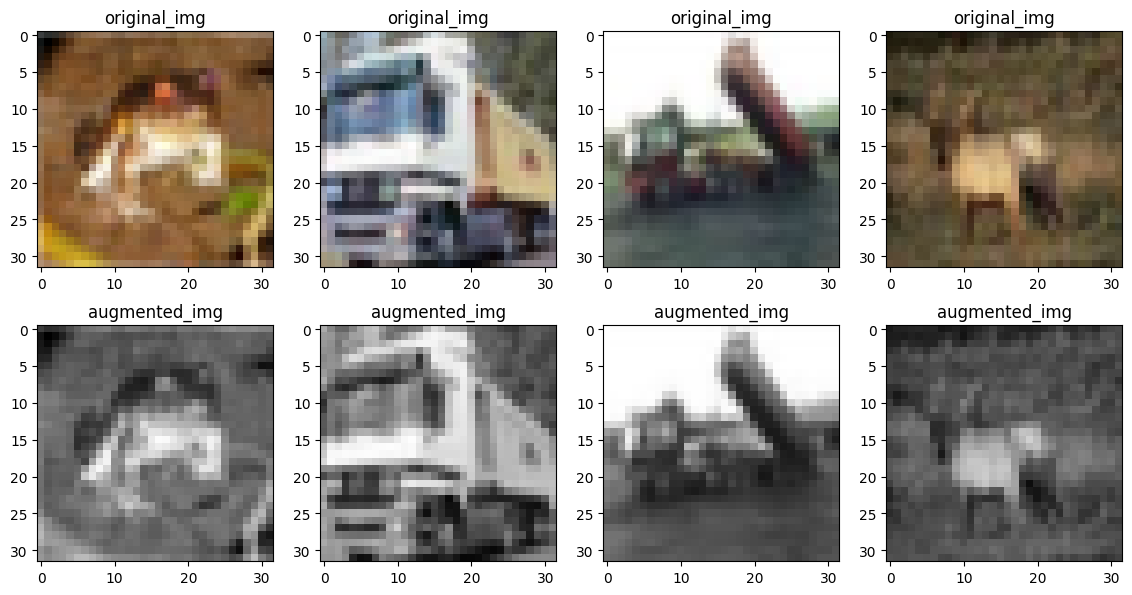

In [ ]:
gray = transforms.RandomGrayscale(p=1) # 흑백으로 변환
visualize(gray)

## Random Perspective

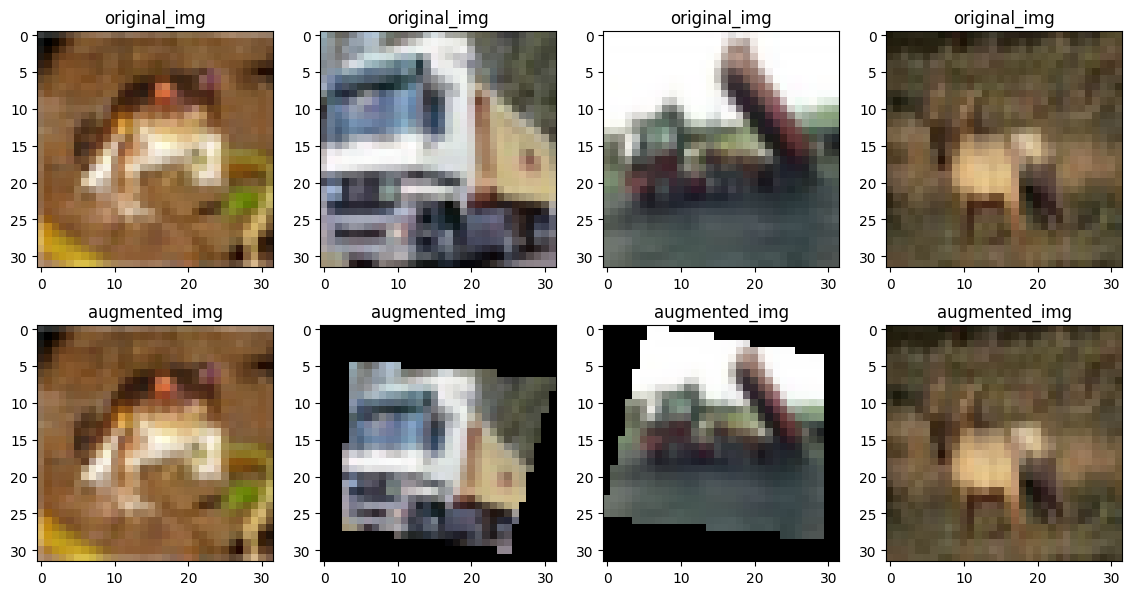

In [ ]:
perspective = transforms.RandomPerspective() # 원근
visualize(perspective)

## Color Jutter

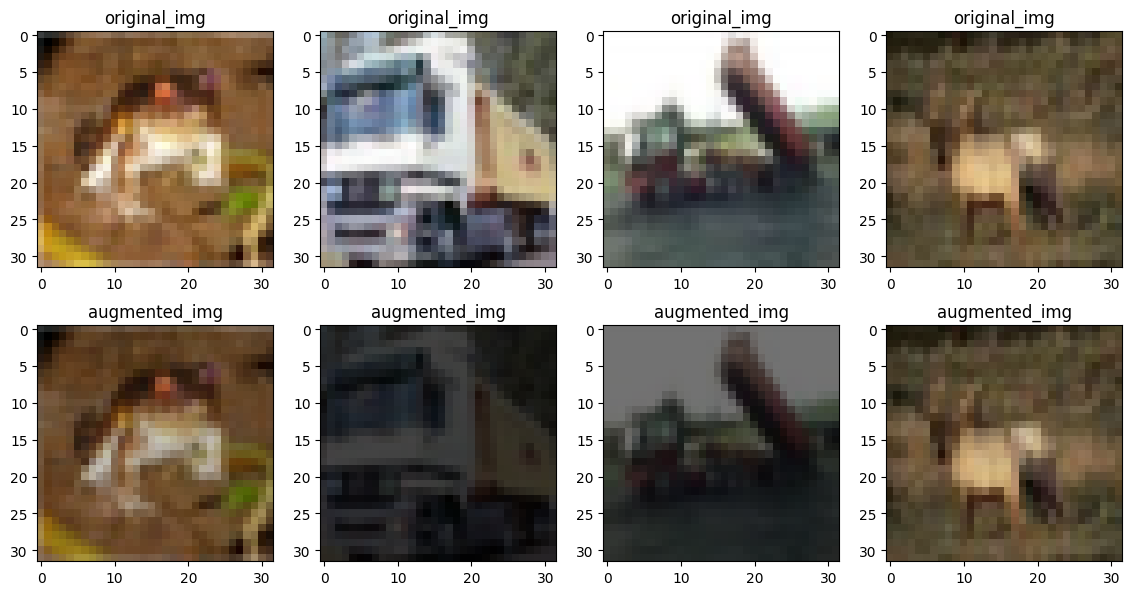

In [ ]:
jitter = transforms.ColorJitter(brightness=(0.2,2)) # 이미지 밝기 조절
visualize(jitter)

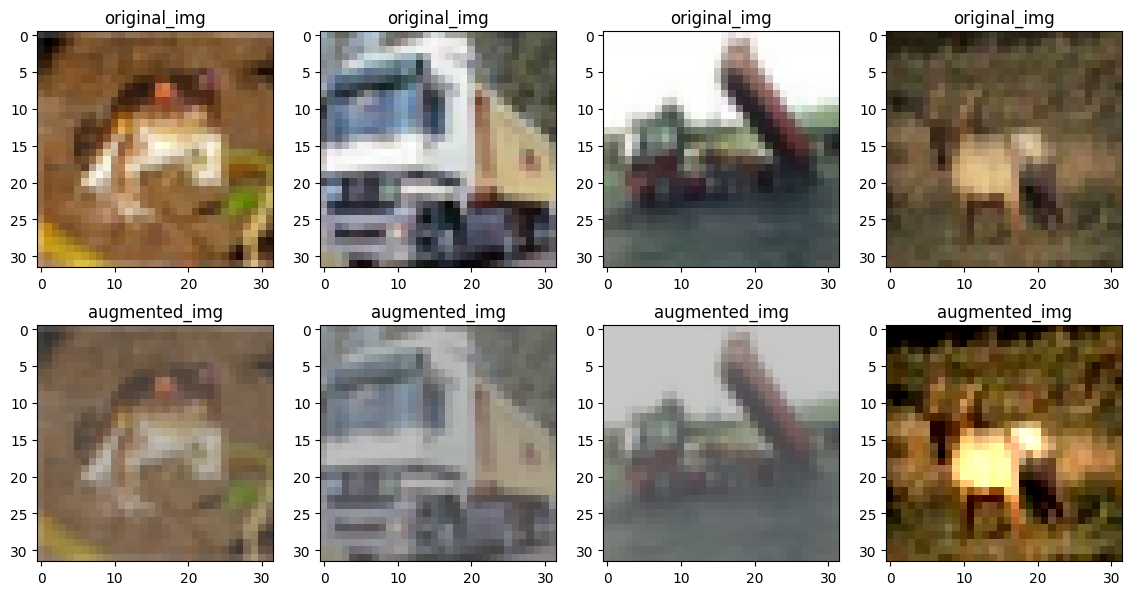

In [ ]:
jitter = transforms.ColorJitter(contrast=(0.2,2)) # 이미지 대비
visualize(jitter)

# Pytorch - CNN을 활용한 이미지 분류 실습

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
x = torch.randn(128, 1, 28, 28).to(device) # 128개의 1개의 채널, 28*28인 배열

## Conv2d

In [ ]:
conv_layer = nn.Conv2d(1, 32, kernel_size=3) # (28 - 3) / 1 + 1 = 26
x_after_conv = conv_layer(x)
x_after_conv.shape

torch.Size([128, 32, 26, 26])

In [ ]:
conv_layer = nn.Conv2d(1, 32, kernel_size=3, stride=2) # (28 - 3) / 2 + 1 = np.ceil(13.5) = 14
x_after_conv = conv_layer(x)
x_after_conv.shape

torch.Size([128, 32, 13, 13])

In [ ]:
import numpy as np
np.ceil(13.5)

14.0

In [ ]:
conv_layer = nn.Conv2d(1, 32, kernel_size=3, padding=1) # ((28-3) + (2*1)) / 1 + 1
x_after_conv = conv_layer(x)
x_after_conv.shape

torch.Size([128, 32, 28, 28])

In [ ]:
x = torch.randn(128, 1, 28, 28).to(device)

## MaxPool, AvgPool

In [ ]:
maxpool = nn.MaxPool2d(kernel_size=2, stride=2) # (28 - 2) / 2 + 1
x_after_maxpool = maxpool(x)
x_after_maxpool.shape

torch.Size([128, 1, 14, 14])

In [ ]:
maxpool = nn.MaxPool2d(kernel_size=4, stride=4) # (28 - 4) / 4 + 1 = 6.8
x_after_maxpool = maxpool(x)
x_after_maxpool.shape

torch.Size([128, 1, 7, 7])

In [ ]:
avgpool = nn.AvgPool2d(kernel_size=4, stride=4) # (28 - 4) / 4 + 1 = 6.8
x_after_avgpool = avgpool(x)
x_after_avgpool.shape

torch.Size([128, 1, 7, 7])

In [ ]:
avgpool = nn.AvgPool2d(kernel_size=7, stride=7) # (28 - 7) / 7 + 1 = 4
x_after_avgpool = avgpool(x)
x_after_avgpool.shape

torch.Size([128, 1, 4, 4])

In [ ]:
x = torch.randn(128, 1, 28, 28).to(device)

## Global average pooling

In [ ]:
# 입력 텐서의 높이와 너비를 각각 1로 축소하여, 각 채널에 대한 평균값을 계산하는 레이어입니다.
global_avg_pool = nn.AdaptiveAvgPool2d((1,1))

x_after_global_avg_pool = global_avg_pool(x)
x_after_global_avg_pool.shape

torch.Size([128, 1, 1, 1])

이 레이어는 주로 마지막 CNN 레이어에 사용되며,
각 채널의 특징을 하나의 값으로 요약하여 출력합니다.

출력 텐서는 (배치 크기, 채널 수, 1, 1) 형식이 되며,
이는 각 배치의 채널별 평균값을 나타냅니다.

주요 장점:
1. 모델의 파라미터 수를 줄여 과적합(overfitting) 방지
2. 입력 이미지의 크기에 관계없이 일관된 출력 크기 생성
3. 각 채널의 정보 손실을 최소화하면서 중요한 특징을 추출

## CNN Model

In [ ]:
# Data
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform=transforms.ToTensor()
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform=transforms.ToTensor()
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 52.3MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.53MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.6MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.49MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# 데이터셋 차원 출력
print(f'Train Data Length: {len(train_data)}')  # 훈련 데이터의 샘플 수
print(f'Test Data Length: {len(test_data)}')    # 테스트 데이터의 샘플 수

# 첫 번째 샘플의 차원 확인
sample_image, sample_label = train_data[0]
print(f'Sample Image Shape: {sample_image.shape}')  # 이미지 차원
print(f'Sample Label: {sample_label}')               # 레이블

Train Data Length: 60000
Test Data Length: 10000
Sample Image Shape: torch.Size([1, 28, 28])
Sample Label: 5


In [ ]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

In [ ]:
((28-3) + 2*1) / 1 + 1

28.0

In [ ]:
class CNN_Model(nn.Module):
    def __init__(self, num_classes):  # 수정된 부분
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1) # 128 * 32 * 28 * 28
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2) # 128 * 32 * 14 * 14
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.mlp = nn.Linear(64 * 7 * 7, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool1(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)
        out = self.mlp(out)

        return out

In [ ]:
# 모델 생성 및 디바이스로 이동
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN_Model(num_classes=10).to(device)

In [ ]:
model

CNN_Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (mlp): Linear(in_features=3136, out_features=10, bias=True)
)

In [ ]:
# loss 함수
CELoss = nn.CrossEntropyLoss()
# 최적화 함수
adam_optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 데이터 학습
total_epochs = 3 # 3 epochs

for epoch in range(total_epochs):
    for i, (images, labels) in enumerate(train_loader):
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      ce_loss = CELoss(outputs, labels)

      adam_optimizer.zero_grad() # 기울기 초기화
      ce_loss.backward() # 손실에 대한 기울기를 계산 모델 파라미터에 저장
      adam_optimizer.step() # Adam 저장된 기울기를 사용하여 업데이트

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, total_epochs, ce_loss.item()))

Epoch [1/3], Loss: 0.1601
Epoch [2/3], Loss: 0.0770
Epoch [3/3], Loss: 0.0131


In [ ]:
model.eval() # 평가모드 설정
with torch.no_grad(): # 그라디언트 계산 비활성화
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 98.72 %


In [ ]:
# 모델 저장
torch.save(model.state_dict(), 'model_cnn.ckpt')

In [ ]:
# 모델 불러오기
model.load_state_dict(torch.load('model_cnn.ckpt', weights_only=True))

<All keys matched successfully>

# Pytorch - Hyper Parameter 실습

## Data Augmentation

In [ ]:
transform = transforms.Compose([
  transforms.RandomResizedCrop(32, scale=(0.2, 1.0)),
  transforms.RandomHorizontalFlip(),
  transforms.RandomGrayscale(p=0.3),
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# 이미지의 각 채널(RGB)에 대해 평균 0.5, 표준편차 0.5로 정규화합니다.
# 각 픽셀 값을 (픽셀 - 평균) / 표준편차로 정규화하여 모델이 데이터를 더 쉽게 학습할 수 있도록 돕습니다.
])

In [ ]:
train_data = datasets.CIFAR10(
    root = 'data',
    train = True,
    download = True,
    transform=transform # 변환 부분
)
test_data = datasets.CIFAR10(
    root = 'data',
    train = False,
    download = True,
    transform=transform # 변환 부분
)

100%|██████████| 170M/170M [00:04<00:00, 41.6MB/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

In [ ]:
next(iter(train_loader))[0].shape

torch.Size([128, 3, 32, 32])

In [ ]:
class CNN_Model(nn.Module):
    def __init__(self, num_classes):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.mlp = nn.Linear(256*2*2, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool1(out)
#         print('out 1:',out.shape) # [128, 32, 16, 16]

        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool2(out)
#         print('out 2:',out.shape) # [128, 64, 8, 8]

        out = self.conv3(out)
        out = self.relu(out)
        out = self.maxpool3(out)
#         print('out 3:',out.shape) # [128, 128, 4, 4]

        out = self.conv4(out)
        out = self.relu(out)
        out = self.maxpool4(out)
#         print('out 4:',out.shape) # [128, 256, 2, 2]

        out = out.view(out.size(0), -1)
        out = self.mlp(out) # 마지막 classification을 위해 필요

        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN_Model(num_classes=10).to(device)
model

CNN_Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (mlp): Linear(in_features=1024, out_features=10, bias=True)
)

## 다양한 모델 구조
- Layer 3개, kernel size, stride, padding 모두 다르게
- Channel 3 - 16 - 64 - 128
- 원하는대로 바꿀 수 있다!

In [ ]:
class CNN_Model(nn.Module):
    def __init__(self, num_classes):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=7, stride=2, padding=1)
        self.relu = nn.ReLU()

        self.conv2 = nn.Conv2d(16, 64, kernel_size=5, stride=2)
        self.relu = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.mlp = nn.Linear(128*1*1, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
#         print('out 1:',out.shape) # [128, 32, 14, 14]

        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool2(out)
#         print('out 2:',out.shape) # [128, 64, 2, 2]

        out = self.conv3(out)
        out = self.relu(out)
        out = self.maxpool3(out)
#         print('out 3:',out.shape) # [128, 128, 1, 1]

        out = out.view(out.size(0), -1)
        out = self.mlp(out) # 마지막 classification을 위해 필요

        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN_Model(num_classes=10).to(device)
model

CNN_Model(
  (conv1): Conv2d(3, 16, kernel_size=(7, 7), stride=(2, 2), padding=(1, 1))
  (relu): ReLU()
  (conv2): Conv2d(16, 64, kernel_size=(5, 5), stride=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (mlp): Linear(in_features=128, out_features=10, bias=True)
)

## Activation
- ReLU
- LeakyReLU
- Sigmoid
- Tanh
등 자유롭게 사용 가능하며 일반적으로 ReLU를 많이 사용

In [ ]:
class CNN_Model(nn.Module):
    def __init__(self, num_classes):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.nonlinear = nn.ReLU()
#         self.nonlinear = nn.LeakyReLU()
#         self.nonlinear = nn.Sigmoid()
#         self.nonlinear = nn.Tanh()

        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.nonlinear = nn.ReLU()
#         self.nonlinear = nn.LeakyReLU()
#         self.nonlinear = nn.Sigmoid()
#         self.nonlinear = nn.Tanh()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.nonlinear = nn.ReLU()
#         self.nonlinear = nn.LeakyReLU()
#         self.nonlinear = nn.Sigmoid()
#         self.nonlinear = nn.Tanh()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.nonlinear = nn.ReLU()
#         self.nonlinear = nn.LeakyReLU()
#         self.nonlinear = nn.Sigmoid()
#         self.nonlinear = nn.Tanh()
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.mlp = nn.Linear(256*2*2, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.nonlinear(out)
        out = self.maxpool1(out)
#         print('out 1:',out.shape) # [128, 32, 16, 16]

        out = self.conv2(out)
        out = self.nonlinear(out)
        out = self.maxpool2(out)
#         print('out 2:',out.shape) # [128, 64, 8, 8]

        out = self.conv3(out)
        out = self.nonlinear(out)
        out = self.maxpool3(out)
#         print('out 3:',out.shape) # [128, 128, 4, 4]

        out = self.conv4(out)
        out = self.nonlinear(out)
        out = self.maxpool4(out)
#         print('out 4:',out.shape) # [128, 256, 2, 2]

        out = out.view(out.size(0), -1)
        out = self.mlp(out) # 마지막 classification을 위해 필요

        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN_Model(num_classes=10).to(device)
model

CNN_Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (nonlinear): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (mlp): Linear(in_features=1024, out_features=10, bias=True)
)

## Dropout / Batch Normalization
- 원하는 위치에 사용
- 일반적으로 Convolution Layer와 NonLinear 함수 사이에 사용한다

In [ ]:
class CNN_Model(nn.Module):
    def __init__(self, num_classes):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.mlp = nn.Linear(256*2*2, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.maxpool1(out)
#         print('out 1:',out.shape) # [128, 32, 16, 16]

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.maxpool2(out)
#         print('out 2:',out.shape) # [128, 64, 8, 8]

        out = self.conv3(out)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.maxpool3(out)
#         print('out 3:',out.shape) # [128, 128, 4, 4]

        out = self.conv4(out)
        out = self.relu(out)
        out = self.maxpool4(out)
#         print('out 4:',out.shape) # [128, 256, 2, 2]

        out = out.view(out.size(0), -1)
        out = self.mlp(out) # 마지막 classification을 위해 필요

        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN_Model(num_classes=10).to(device)
model

CNN_Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout): Dropout(p=0.5, inplace=False)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (mlp): Linear(in_features=1024, out_features=10, bias=True)
)

In [ ]:
CELoss = nn.CrossEntropyLoss()
adam_optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # 최적화 알고리즘 class 선언

In [ ]:
# 뉴럴 네트워크 모델 학습
total_epochs = 3
print('number of iteration :', len(train_loader))
# epoch : 모든 데이터를 한 번 학습하는 단위
for epoch in range(total_epochs):
    # iteration : 한 'mini-batch' 단위의 데이터를 학습하는 단위
    for i, (images, labels) in enumerate(train_loader):
        # images : [mini-batch, 1, 28, 28]
        # labels : [mini-batch]
#         images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        ce_loss = CELoss(outputs, labels)

        # Backward and optimize
        adam_optimizer.zero_grad() # 다양한 optimization 기법 적용 가능
        ce_loss.backward() # Back propagation
        adam_optimizer.step() # optimizer 작동

    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, total_epochs, ce_loss.item()))

number of iteration : 391
Epoch [1/3], Loss: 1.5191
Epoch [2/3], Loss: 1.4521
Epoch [3/3], Loss: 1.2803


## Loss Function
- 원하는 목적 및 tasks에 따라 다양한 Loss Function 적용 가능
- 일반적으로 분류 문제는 CrossEntropyLoss, 회귀 문제에는 MSELoss를 주로 사용

In [ ]:
Loss = nn.CrossEntropyLoss()

In [ ]:
Loss = nn.L1Loss()

In [ ]:
Loss = nn.MSELoss()

In [ ]:
Loss = nn.NLLLoss

In [ ]:
Loss = nn.BCELoss()

## Optimization
- 여러 optimization을 사용할 수 있음
- 일반적으로 SGD with momentum과 Adam을 주로 많이 사용

In [ ]:
# Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Stochastic Gradient Descent with momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Adagrad
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)

# RMSprop
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

# Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Tensorflow - 데이터 증강 기법

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets
import numpy as np

In [57]:
(images_train,labels_train), (images_test,labels_test) = datasets.cifar10.load_data()
print('----------------train----------------')
print('images:',images_train.shape, images_train.min(), images_train.max())
print('labels:',labels_train.shape)
print('----------------test----------------')
print('images:',images_test.shape, images_test.min(), images_test.max())
print('labels:',labels_test.shape)

----------------train----------------
images: (50000, 32, 32, 3) 0 255
labels: (50000, 1)
----------------test----------------
images: (10000, 32, 32, 3) 0 255
labels: (10000, 1)


시각화를 위해 필요한 모듈

In [58]:
images_train=images_train/255.

In [59]:
import matplotlib.pyplot as plt
from PIL import Image

시각화 함수

In [60]:
def visualize(augmentation_func):
    fig, subplots = plt.subplots(2, 4, figsize=(14, 7)) # 2행 4열에 size 14x7
    for i in range(4):
        axi1 = subplots.flat[i]
        axi2 = subplots.flat[i+4]

        original_img = tf.expand_dims(images_train[i],0)
        augmented_img = augmentation_func(original_img)[0]

        axi1.imshow(original_img[0])
        axi2.imshow(augmented_img)
        axi1.set_title('original_img')
        axi2.set_title('augmented_img')

### Random Flip left right
random으로 좌우 이미지 반전

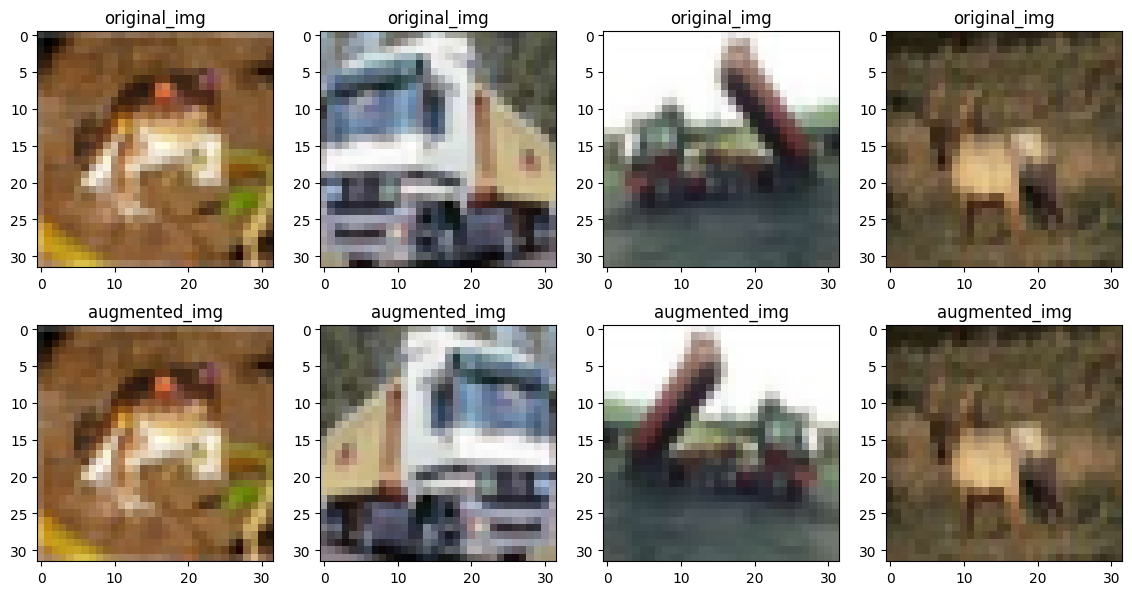

In [62]:
aug = layers.RandomFlip("horizontal")
visualize(aug)

### Random Flip up down
random으로 위 아래 반전

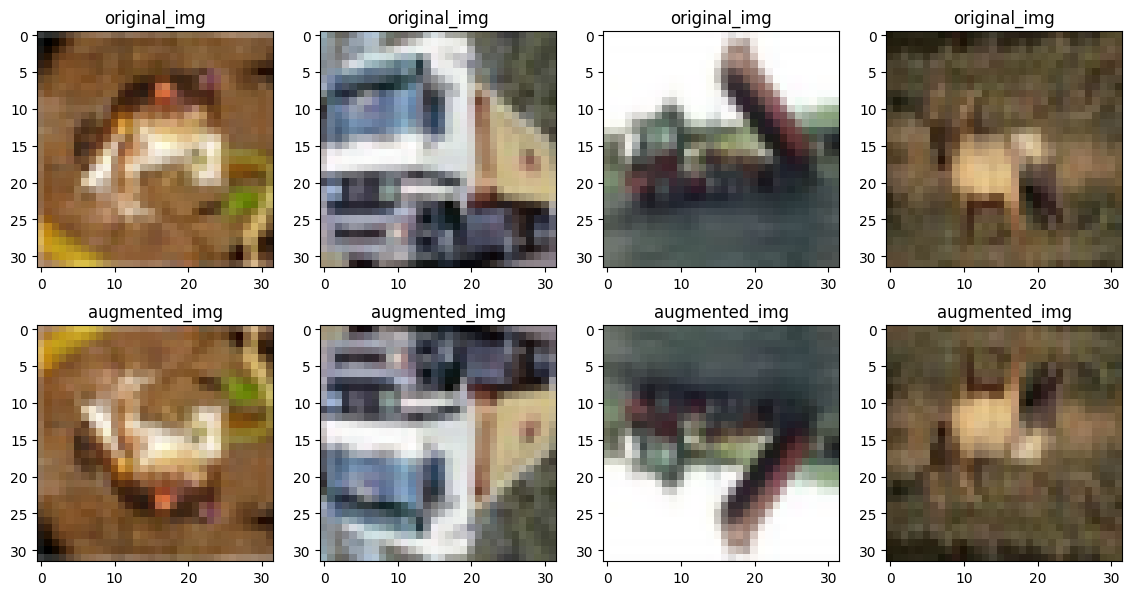

In [64]:
aug = layers.RandomFlip("vertical")
visualize(aug)

### Random Flip Horizontal and Vertical
random 위 아래, 왼 오른 랜덤으로 반전

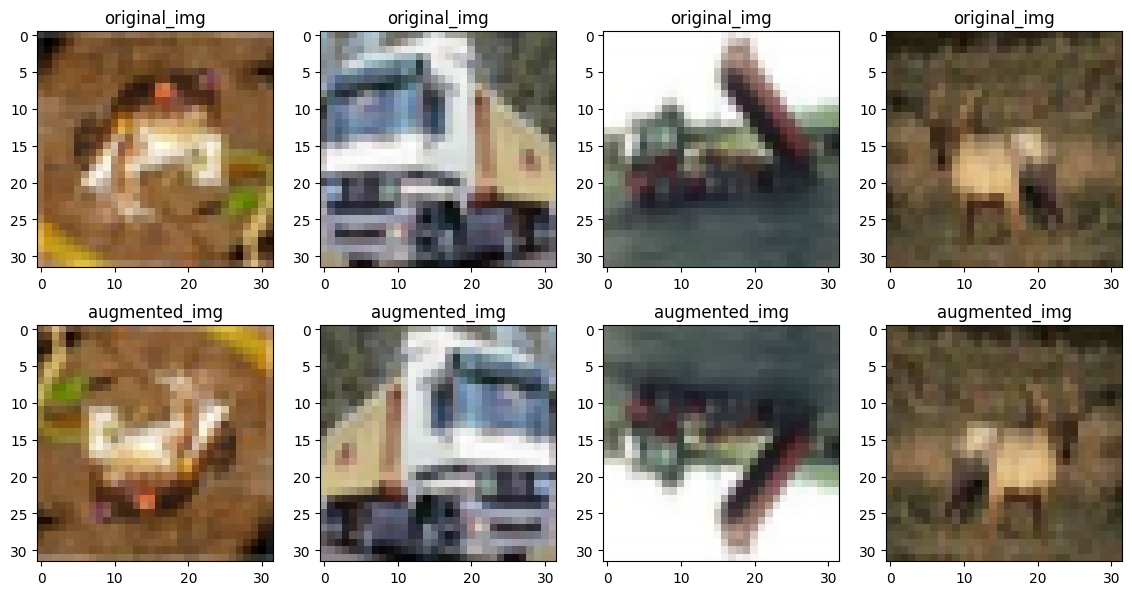

In [65]:
aug = layers.RandomFlip("horizontal_and_vertical")
visualize(aug)

### Random Rotation
image를 회전

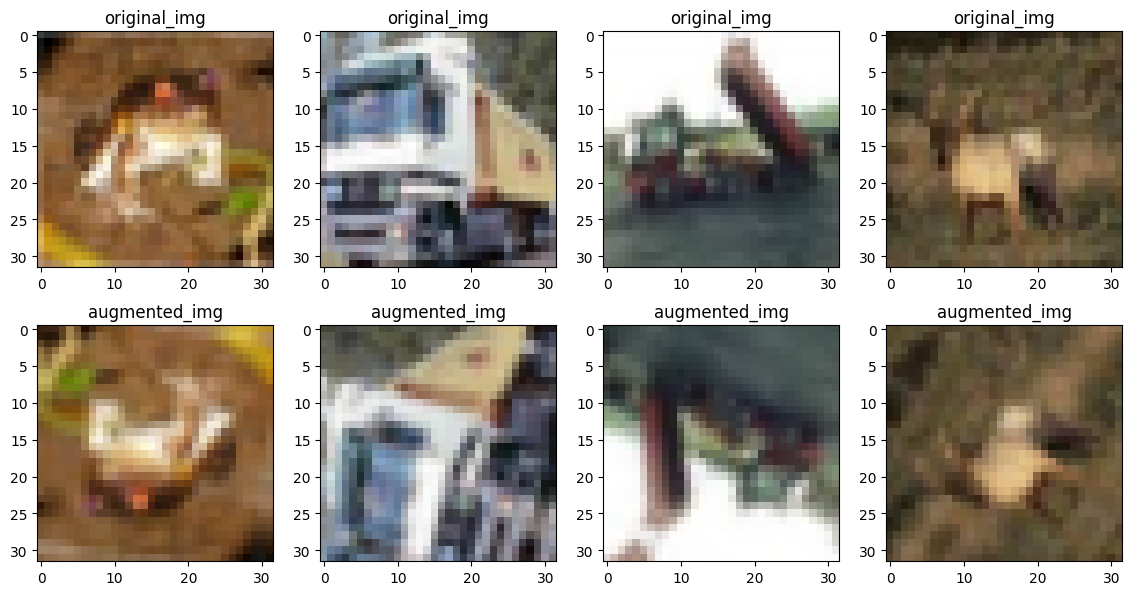

In [66]:
aug = layers.RandomRotation(0.5)
visualize(aug)

### Random Crop
random한 위치에서 이미지가 잘림

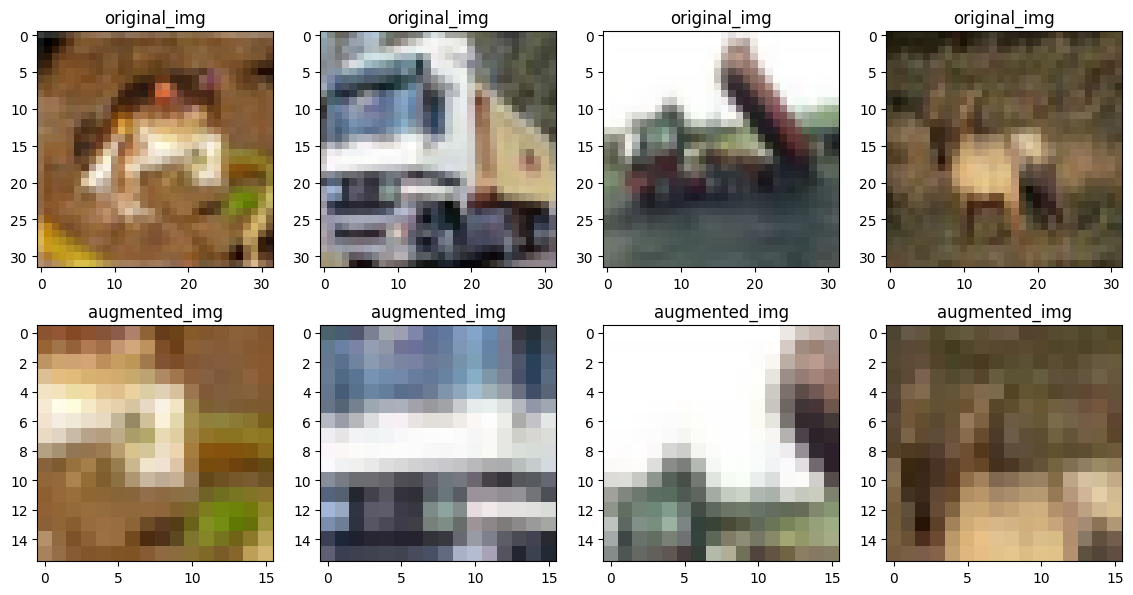

In [67]:
aug = layers.RandomCrop(16, 16) # 16 by 16 image로 잘림
visualize(aug)

### Center Crop
정해진 크기로 이미지의 중앙 부분을 잘라냄

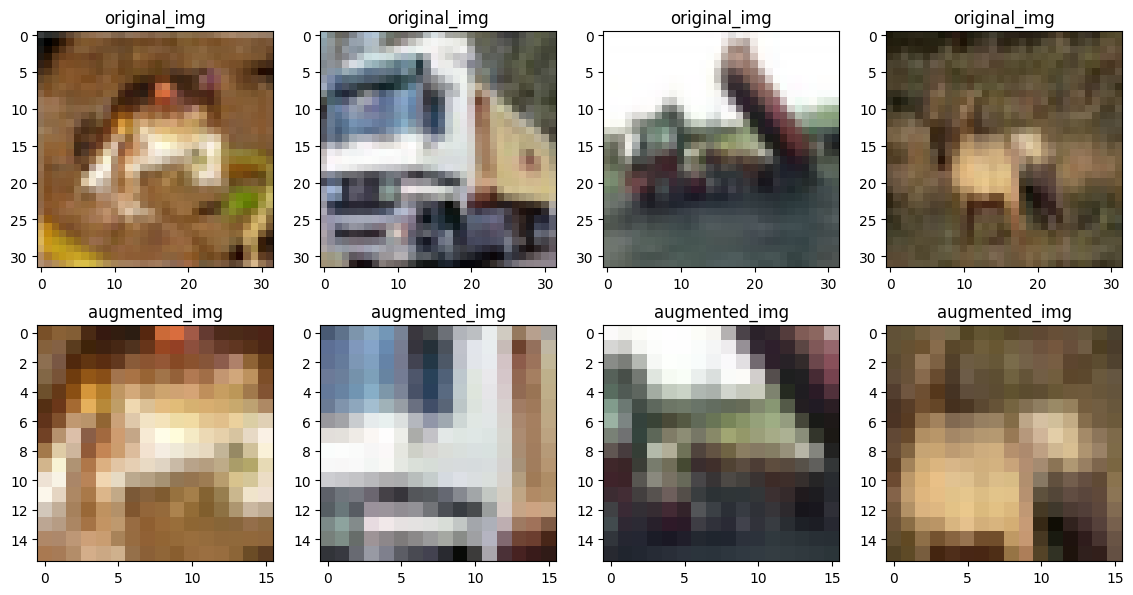

In [68]:
aug = layers.CenterCrop(16, 16) # 16 by 16 image로 잘림
visualize(aug)

### Random contrast
이미지 대조를 랜덤 변화

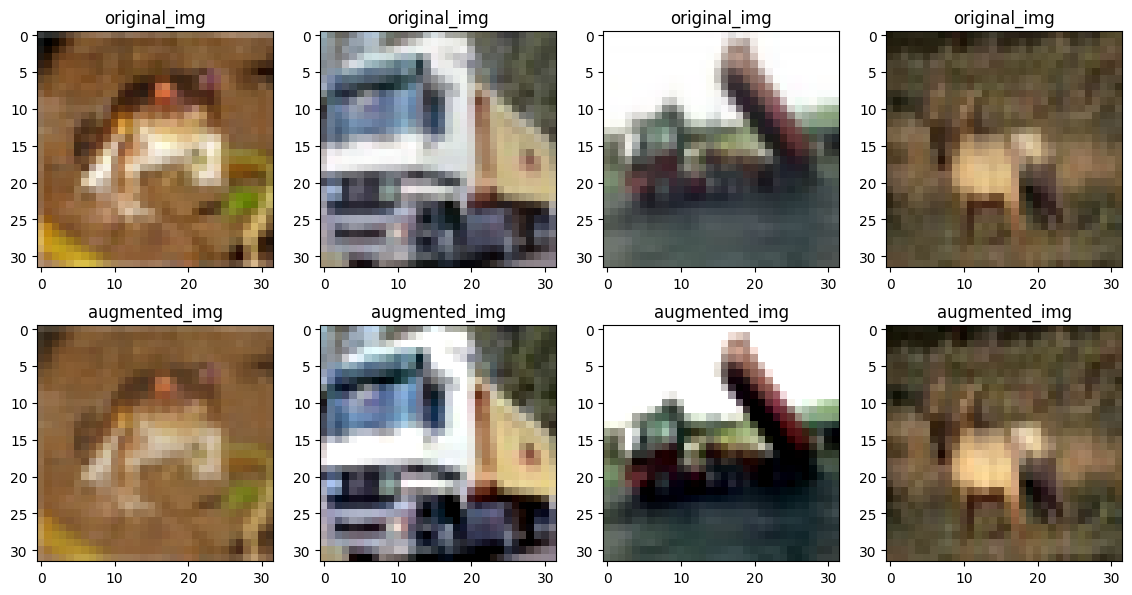

In [69]:
aug = layers.RandomContrast(0.5)
# 각 channel마다 대조가 [1-0.5, 1+0.5]의 factor로 랜덤하게 선택됨
visualize(aug)

### Resize

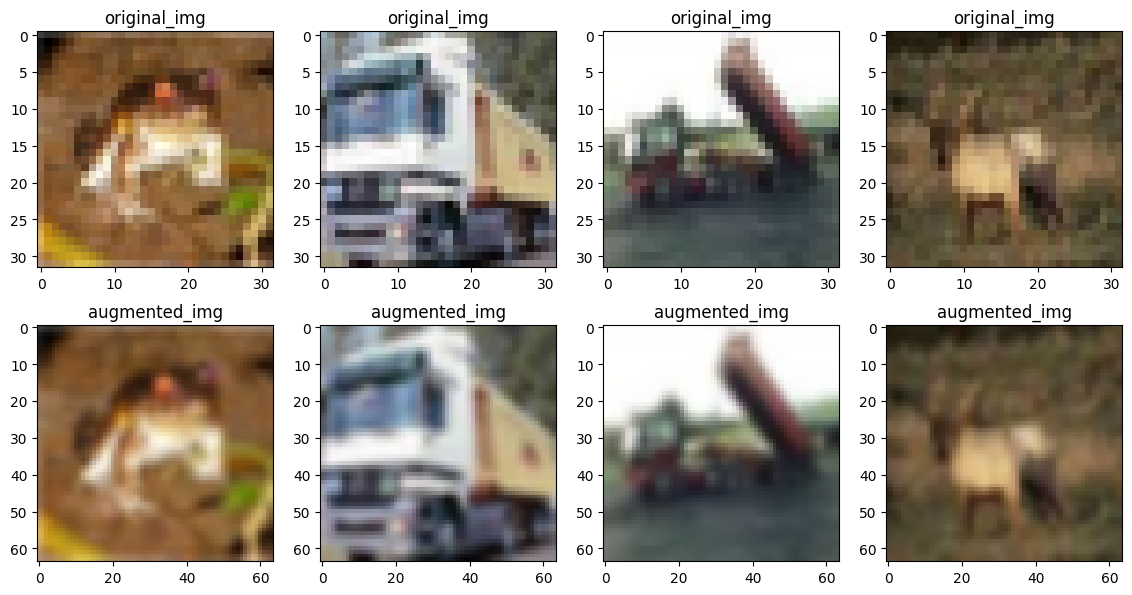

In [70]:
aug = layers.Resizing(64, 64) # 64 by 64 image로 resize
visualize(aug)

## DataLoader

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets

In [2]:
(images_train, labels_train), (images_test, labels_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print(images_train.shape, labels_train.shape)
print(images_test.shape, labels_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
print(images_train.min())
print(images_train.max())

0
255


In [5]:
images_train = images_train/255.

In [6]:
print(images_train.min())
print(images_train.max())

0.0
1.0


시각화 함수

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
def visualize(augmentation_func):
    fig, axes = plt.subplots(2, 4, figsize=(14, 7))
    for i in range(4):
        ax1 = axes[0, i]  # First row
        ax2 = axes[1, i]  # Second row

        original_img = tf.expand_dims(images_train[i], 0)  # 32,32,3 -> 1, 32,32, 3
        augmented_img = augmentation_func(original_img)[0]  # 32, 32, 3

        ax1.imshow(original_img[0])
        ax2.imshow(augmented_img)

        ax1.set_title('original_img')
        ax2.set_title('augmented_img')

    plt.tight_layout()
    plt.show()

RandomCrop

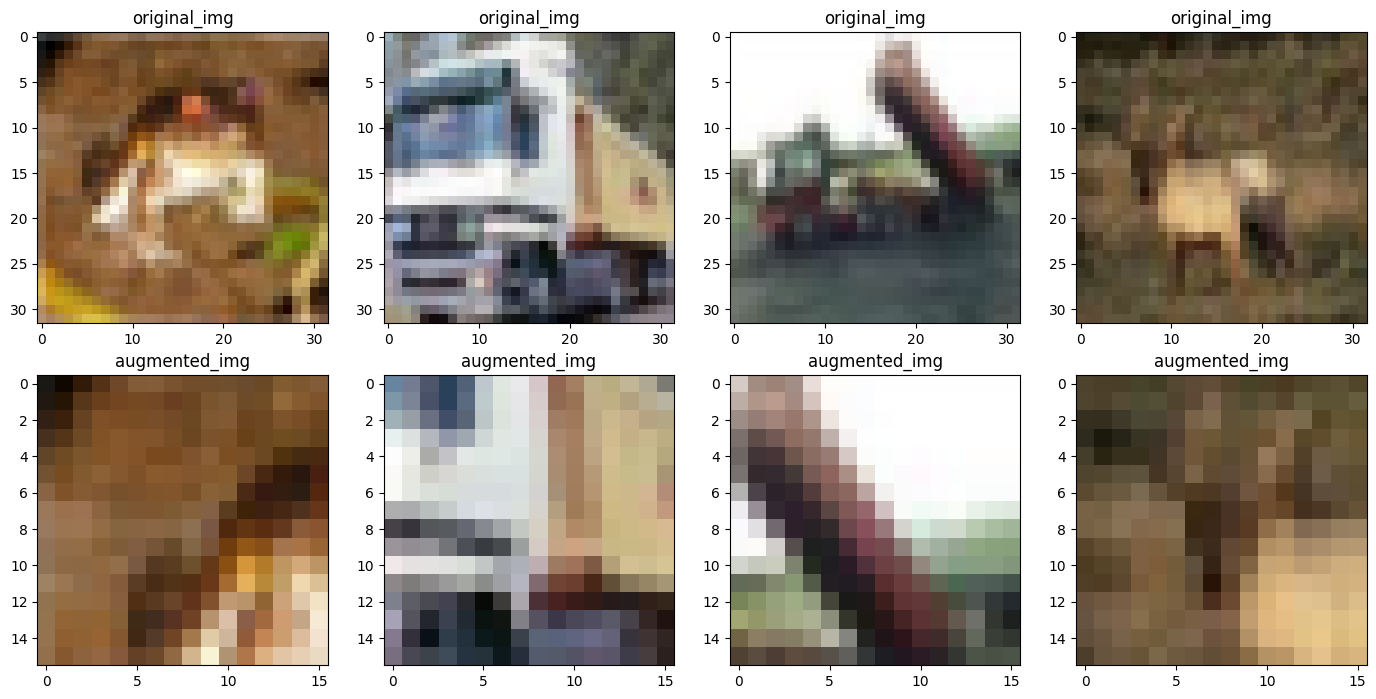

In [12]:
aug = layers.RandomCrop(16, 16)
visualize(aug)

CenterCrop

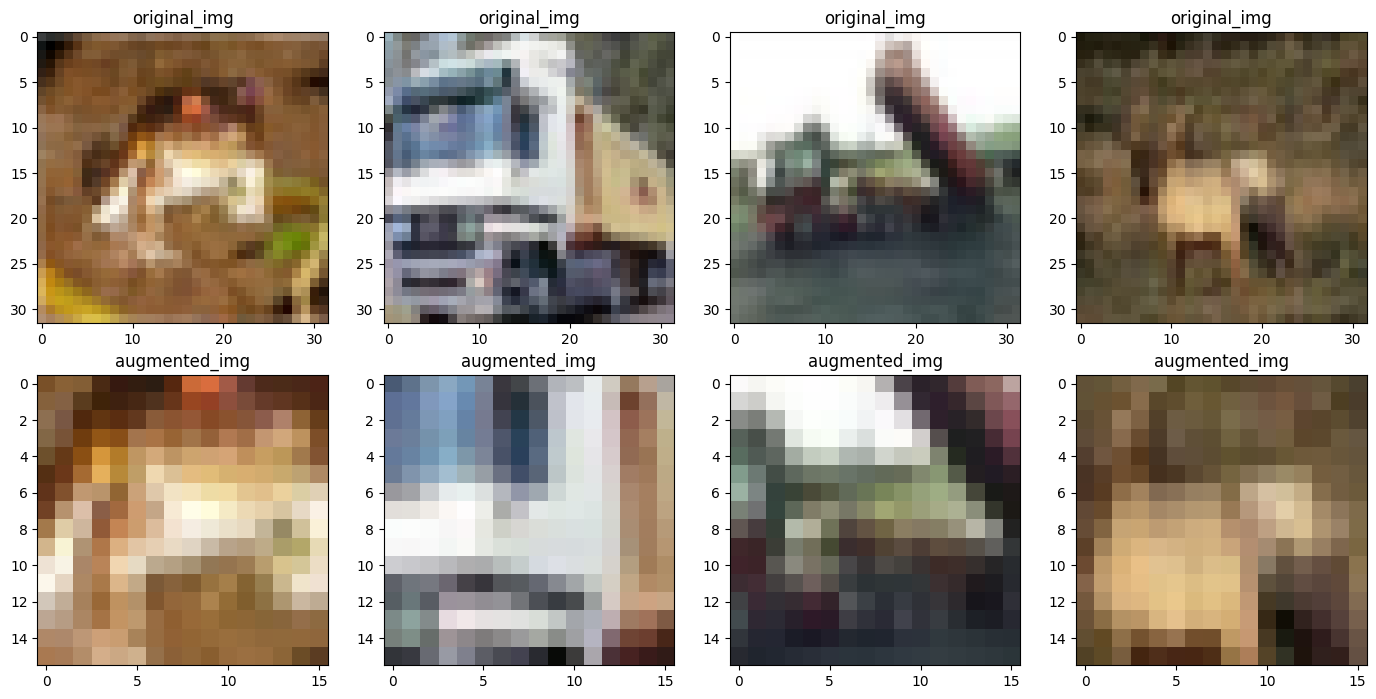

In [13]:
aug = layers.CenterCrop(16,16)
visualize(aug)

## layers.Conv2D

In [14]:
x = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.)
x.shape

TensorShape([128, 28, 28, 1])

In [18]:
x_after_conv1 = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x_after_conv1.shape

TensorShape([128, 26, 26, 32])

In [19]:
x_after_conv2 = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu')(x)
x_after_conv2.shape

TensorShape([128, 13, 13, 32])

In [20]:
x_after_conv3 = layers.Conv2D(filters=32, kernel_size=3,padding='same', activation='relu')(x)
x_after_conv3.shape

TensorShape([128, 28, 28, 32])

## layers.MaxPool2D

In [21]:
x = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.)

In [23]:
x_after_maxpool = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x_after_maxpool.shape

TensorShape([128, 14, 14, 1])

In [25]:
x_after_maxpool2 = layers.MaxPool2D(pool_size=(4,4), strides=(4,4), padding='same')(x)
x_after_maxpool2.shape

TensorShape([128, 7, 7, 1])

## layers.AveragePooling2D

In [26]:
x_after_avgpool = layers.AveragePooling2D(pool_size=(2,2), strides=(2,2))(x)
x_after_avgpool.shape

TensorShape([128, 14, 14, 1])

In [27]:
x_after_avgpool2 = layers.AveragePooling2D(pool_size=(7,7), strides=(7,7))(x)
x_after_avgpool2.shape

TensorShape([128, 4, 4, 1])

## layers.GlobalAveragePooling2D

In [31]:
x_after_global_pool1 = layers.GlobalAveragePooling2D()(x)
x_after_global_pool1.shape

TensorShape([128, 1])

## CNN Aplication

In [33]:
(images_train, labels_train), (images_test, labels_test) = datasets.mnist.load_data()
print(images_train.shape, labels_train.shape)
print(images_test.shape, labels_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [34]:
images_train = images_train.reshape((60000, 28, 28, 1))
images_train = images_train.astype('float32')/255

In [35]:
images_test = images_test.reshape((10000, 28, 28, 1))
images_test = images_test.astype('float32')/255

In [36]:
images_train.shape

(60000, 28, 28, 1)

In [37]:
images_test.shape

(10000, 28, 28, 1)

In [38]:
images_train.max()

1.0

In [39]:
input_shape = (28, 28, 1)
num_classes = 10

In [43]:
model = tf.keras.models.Sequential([
    layers.Input(shape=input_shape),  # Specify the input shape here
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
model_train = model.fit(images_train, labels_train, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.8453 - loss: 0.5068 - val_accuracy: 0.9822 - val_loss: 0.0633
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 96ms/step - accuracy: 0.9818 - loss: 0.0603 - val_accuracy: 0.9848 - val_loss: 0.0544
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.9884 - loss: 0.0381 - val_accuracy: 0.9841 - val_loss: 0.0524
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 0.9869 - val_loss: 0.0447
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 102ms/step - accuracy: 0.9934 - loss: 0.0208 - val_accuracy: 0.9889 - val_loss: 0.0392


In [49]:
test_loss, test_acc = model.evaluate(images_test, labels_test, verbose=2)
print(test_acc)

313/313 - 2s - 8ms/step - accuracy: 0.9901 - loss: 0.0326
0.9901000261306763


### 모델 저장

In [52]:
model_save_callback = tf.keras.callbacks.ModelCheckpoint(filepath='cnn_model.weights.h5', save_weights_only=True, verbose=2)

In [53]:
models_train = model.fit(images_train, labels_train, batch_size=128, epochs=5, validation_split=0.2, callbacks=[model_save_callback])

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9948 - loss: 0.0163
Epoch 1: saving model to cnn_model.weights.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - accuracy: 0.9948 - loss: 0.0163 - val_accuracy: 0.9897 - val_loss: 0.0346
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9965 - loss: 0.0123
Epoch 2: saving model to cnn_model.weights.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.9965 - loss: 0.0123 - val_accuracy: 0.9864 - val_loss: 0.0509
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9967 - loss: 0.0112
Epoch 3: saving model to cnn_model.weights.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.9967 - loss: 0.0112 - val_accuracy: 0.9900 - val_loss: 0.0413
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9976 - loss: 0.0077
Epoch 4: saving model to cnn_model.weights.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9976 - loss: 0.0077 - val_accuracy: 0.9889 - val_loss: 0

### 모델 불러오기

In [54]:
checkpoint_path = 'cnn_model.weights.h5'
model.load_weights(checkpoint_path)

In [55]:
loss, acc = model.evaluate(images_test, labels_test, verbose=2)

313/313 - 3s - 9ms/step - accuracy: 0.9905 - loss: 0.0332


# Hyper Parameter 실습

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, layers, optimizers, datasets
import numpy as np

### Data Augmentation
Data를 load할 때 다양한 augmentation 적용

In [85]:
(images_train,labels_train), (images_test,labels_test) = datasets.mnist.load_data()
print('----------------train----------------')
print('images:',images_train.shape, images_train.min(), images_train.max())
print('labels:',labels_train.shape)
images_train = images_train.reshape((60000,28,28,1))
images_train = images_train.astype("float32")/255
print('normalized images:',images_train.shape, images_train.min(), images_train.max())

print('----------------test----------------')
print('images:',images_test.shape, images_test.min(), images_test.max())
print('labels:',labels_test.shape)
images_test = images_test.reshape((10000,28,28,1))
images_test = images_test.astype("float32")/255
print('normalized images:',images_test.shape, images_test.min(), images_test.max())

----------------train----------------
images: (60000, 28, 28) 0 255
labels: (60000,)
normalized images: (60000, 28, 28, 1) 0.0 1.0
----------------test----------------
images: (10000, 28, 28) 0 255
labels: (10000,)
normalized images: (10000, 28, 28, 1) 0.0 1.0


In [86]:
import matplotlib.pyplot as plt
from PIL import Image

In [87]:
data_resize_scale = tf.keras.Sequential([
    layers.Resizing(32, 32),
    layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomContrast(0.5),
    layers.Rescaling(1./255)
])

In [113]:
input_shape = (28, 28, 1)
num_classes = 10
model = tf.keras.models.Sequential([
    data_augmentation,  # 데이터 증강 레이어
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [115]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Batch Size
Batch Size : 128

In [116]:
model_train = model.fit(images_train, labels_train,
                    batch_size=128,
                    epochs=3,
                    validation_split=0.2)

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 95ms/step - accuracy: 0.1512 - loss: 2.2440 - val_accuracy: 0.4396 - val_loss: 1.5951
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - accuracy: 0.4478 - loss: 1.5723 - val_accuracy: 0.5254 - val_loss: 1.2789
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.5281 - loss: 1.3322 - val_accuracy: 0.6169 - val_loss: 1.1218


Batch Size : 256

In [117]:
model_train = model.fit(images_train, labels_train,
                    batch_size=256,
                    epochs=3,
                    validation_split=0.2)

Epoch 1/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.5782 - loss: 1.2145 - val_accuracy: 0.6402 - val_loss: 1.0652
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 34s 181ms/step - accuracy: 0.5894 - loss: 1.1855 - val_accuracy: 0.6534 - val_loss: 1.0345
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 35s 185ms/step - accuracy: 0.6141 - loss: 1.1335 - val_accuracy: 0.6823 - val_loss: 0.9764


### 다양한 모델 구조
layer 수, kernel size, stride, padding

In [94]:
input_shape = (28, 28, 1)
num_classes = 10
model = tf.keras.models.Sequential([
    data_augmentation,
    layers.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

### Activation

- 각 layer마다 activation=''으로 넣어도 됨
- tf.keras.layers.Activation('')으로 넣어도 됨
- 어느 방식으로 해도 된다

In [95]:
input_shape = (28, 28, 1)
num_classes = 10
model = tf.keras.models.Sequential([
    data_augmentation,
    layers.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='sigmoid'), # sigmoid
    tf.keras.layers.MaxPool2D(strides=(2,2)),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.leaky_relu),
#     tf.keras.layers.LeakyReLU(), # leaky relu
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('tanh'), # tanh
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

### Dropout / Batch Normalization

In [96]:
input_shape = (28, 28, 1)
num_classes = 10
model = tf.keras.models.Sequential([
    data_augmentation,
    layers.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, (3,3), padding='same'),
    tf.keras.layers.Dropout(rate=0.2), # Drop Out
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),

    tf.keras.layers.Conv2D(64, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(), # Batch Normalization
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

### Loss Function

Categorical Cross Entropy
- label이 one-hot 형태이길 기대함

In [97]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [98]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])

Sparse Categorical CrossEntropy
- label이 int 형태이길 기대함

In [99]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [100]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy, metrics=['acc'])

MSE

In [101]:
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

In [102]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['acc'])

MAE

In [103]:
model.compile(optimizer='adam', loss='MAE', metrics=['acc'])

In [104]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanAbsoluteError(), metrics=['acc'])

### Optimization

In [105]:
# Stochastic Gradient Descent
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Stochastic Gradient Descent with momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

# Adagrad
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

# RMSProp
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)